In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import normaltest, zscore, pearsonr
import pickle
import joblib

In [6]:
df = pd.read_csv(r'C:\Users\SreeKeerthiReddyThat\Desktop\statistis\weatherHistory.csv')

In [7]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [9]:
# 2.1 Handle Null Values
null_values = df.isnull().sum()
print(null_values)

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [10]:
X = df[['Formatted Date', 'Summary', 'Temperature (C)', 'Apparent Temperature (C)',
               'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
               'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']]
y = df['Precip Type']


In [11]:
X = X.fillna(X.mode())

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Precip Type'] = le.fit_transform(df['Precip Type'].astype(str))
df['Summary'] = le.fit_transform(df['Summary'].astype(str))
df['Daily Summary'] = le.fit_transform(df['Daily Summary'].astype(str))

In [13]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,19,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,197
1,2006-04-01 01:00:00.000 +0200,19,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,197
2,2006-04-01 02:00:00.000 +0200,17,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197
3,2006-04-01 03:00:00.000 +0200,19,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,197
4,2006-04-01 04:00:00.000 +0200,17,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,197
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,19,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,170
96449,2016-09-09 20:00:00.000 +0200,19,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,170
96450,2016-09-09 21:00:00.000 +0200,19,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,170
96451,2016-09-09 22:00:00.000 +0200,19,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,170


In [14]:
df.drop('Formatted Date', axis=1, inplace=True)

In [15]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,19,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,197
1,19,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,197
2,17,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197
3,19,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,197
4,17,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,197
...,...,...,...,...,...,...,...,...,...,...,...
96448,19,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,170
96449,19,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,170
96450,19,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,170
96451,19,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,170


In [16]:

def perform_feature_selection(data, target_column, corr_threshold=0.0, p_threshold=0.05):
    selected_features = []
    numeric_data = data.select_dtypes(include='number')  # Only numeric features
    correlation_matrix = numeric_data.corr()
    target_correlations = correlation_matrix[target_column]

    print(f"\nCorrelation and p-values with target: '{target_column}'\n")
    print(f"{'Feature':<30}{'r-value':>10}{'p-value':>15}{'Included?':>15}")
    print("-" * 70)

    for feature in target_correlations.index:
        if feature != target_column:
            corr, p_value = pearsonr(data[feature], data[target_column])
            include = abs(corr) > corr_threshold and p_value < p_threshold
            status = "Included" if include else "Excluded"
            print(f"{feature:<30}{corr:>10.4f}{p_value:>15.4f}{status:>15}")
            if include:
                selected_features.append(feature)

    # Final output summary
    print("\n✅ Selected Features (based on correlation > "
          f"{corr_threshold} and p-value < {p_threshold}):")
    for feature in selected_features:
        print(f"- {feature}")

    return selected_features, correlation_matrix

selected_features, corr_matrix = perform_feature_selection(df, 'Temperature (C)')

 


Correlation and p-values with target: 'Temperature (C)'

Feature                          r-value        p-value      Included?
----------------------------------------------------------------------
Summary                           0.1467         0.0000       Included
Precip Type                      -0.5422         0.0000       Included
Apparent Temperature (C)          0.9926         0.0000       Included
Humidity                         -0.6323         0.0000       Included
Wind Speed (km/h)                 0.0090         0.0054       Included
Wind Bearing (degrees)            0.0300         0.0000       Included
Visibility (km)                   0.3928         0.0000       Included
Loud Cover                           nan            nan       Excluded
Pressure (millibars)             -0.0054         0.0907       Excluded
Daily Summary                     0.4389         0.0000       Included

✅ Selected Features (based on correlation > 0.0 and p-value < 0.05):
- Summary
- Precip T

C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_5164\3145405586.py:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(data[feature], data[target_column])


In [17]:
# Final features and target
X = df[selected_features]
y = df['Temperature (C)']

In [18]:
# Set plot style
sns.set(style="whitegrid")

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='YlGnBu',  # different color palette
            linewidths=0.5, 
            linecolor='gray', 
            square=True, 
            cbar_kws={"shrink": 0.8}, 
            ax=ax)

# Add a title and improve layout
ax.set_title('Feature Correlation Heatmap', fontsize=16, pad=12)
plt.tight_layout()

# Save the figure
plt.savefig('feature_correlation_heatmap.png')

# Close the plot
plt.close()


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [21]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [22]:

# Evaluation
print("\n=== Training Performance ===")
print("MAE :", mean_absolute_error(y_train, y_train_pred))
print("MSE :", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R²  :", r2_score(y_train, y_train_pred))

print("\n=== Testing Performance ===")
print("MAE :", mean_absolute_error(y_test, y_test_pred))
print("MSE :", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R²  :", r2_score(y_test, y_test_pred))


=== Training Performance ===
MAE : 0.14175070475574142
MSE : 0.04250924755928546
RMSE: 0.20617770868667024
R²  : 0.9995328569266021

=== Testing Performance ===
MAE : 0.14404677788782763
MSE : 0.042785084095592466
RMSE: 0.20684555614175631
R²  : 0.999535748474421


In [23]:
# Save model using pickle
pickle.dump(model, open('gb_model.pkl', 'wb'))

# Save model using joblib
joblib.dump(model, 'gb_model.joblib')

['gb_model.joblib']

In [24]:
model_pickle = pickle.load(open('gb_model.pkl', 'rb'))
model_joblib = joblib.load('gb_model.joblib')

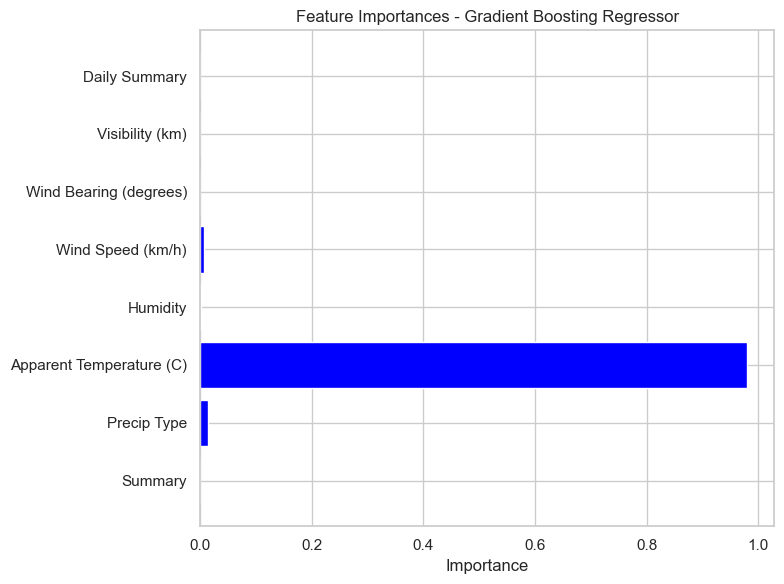

In [25]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='blue')
plt.title("Feature Importances - Gradient Boosting Regressor")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()